# Genetic Algorithm Tessellation
In this notebook, we'll use genetic algorithms to create tessellations!

## Setup

In [1]:
%load_ext autoreload
%autoreload 2

import os
os.chdir("..") # Move execution to root dir

In [2]:
from enum import Enum, auto
from typing import Optional

import numpy as np
from matplotlib import pyplot as plt 

from tessellation.draw import MPLDrawer
from tessellation.procgen.generator import Action
from tessellation.procgen.rng_generator import RNGGenerator

## Configuration

In [3]:
# Proc gen constants
SEED = 32
SIDE_LEN = 100

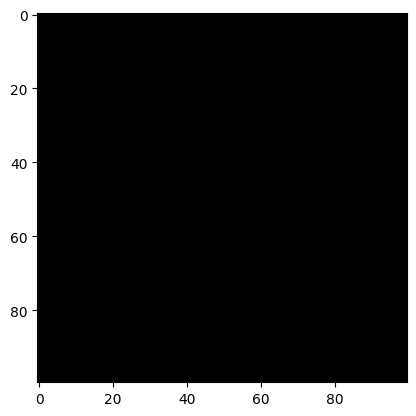

In [4]:
# Draw constants
CMAP = "gray"
drawer = MPLDrawer(CMAP)
drawer.draw(np.zeros((SIDE_LEN, SIDE_LEN), dtype=int))

## Genetic Algorithm Tessellation
We'll be using the LEAP package for our genetic algorithms.

### Simple test
Let's start by trying out the simplest form of GA - simple real-valued function optimization.

In [5]:
from leap_ec.simple import ea_solve

def f(x):
    """A real-valued function to optimized."""
    return sum(x)**2

ea_solve(f, bounds=[(-5.12, 5.12) for _ in range(5)], maximize=True)

step,bsf
0,90.04040597047805
1,165.08465299688828
2,165.08465299688828
3,176.25694437010876
4,221.5851233490782
5,257.0324365983946
6,257.0324365983946
7,259.81799798776905
8,277.2240440547901
9,291.09626322505557
10,291.09626322505557
11,291.09626322505557
12,343.6540610967981
13,355.074998131774
14,355.074998131774
15,423.84787583883275
16,423.84787583883275
17,423.84787583883275
18,423.84787583883275
19,423.84787583883275
20,444.3616087799155
21,547.6091507967454
22,547.6091507967454
23,591.3688188343338
24,591.3688188343338
25,655.3600000000001
26,655.3600000000001
27,655.3600000000001
28,655.3600000000001
29,655.3600000000001
30,655.3600000000001
31,655.3600000000001
32,655.3600000000001
33,655.3600000000001
34,655.3600000000001
35,655.3600000000001
36,655.3600000000001
37,655.3600000000001
38,655.3600000000001
39,655.3600000000001
40,655.3600000000001
41,655.3600000000001
42,655.3600000000001
43,655.3600000000001
44,655.3600000000001
45,655.3600000000001
46,655.3600000000001
47,6

array([-5.12, -5.12, -5.12, -5.12, -5.12])

In [6]:
from leap_ec.algorithm import generational_ea
from leap_ec import ops, decoder, probe, representation
from leap_ec.binary_rep import initializers
from leap_ec.binary_rep import problems
from leap_ec.binary_rep.ops import mutate_bitflip
from leap_ec.Problem import problem

ModuleNotFoundError: No module named 'leap_ec.Problem'

In [ ]:
class TessellationPhenome:
    def __init__(self, actions: list[Action]):
        

In [ ]:
class TessellationProblem(Problem):
    def evaluate(phenome: )

In [ ]:
representation = representation.Representation(
    # Genotype and phenotype are the same for this task
    decoder=decoder.IdentityDecoder(),
    # Initial genomes are random binary sequences
    initialize=initializers.create_binary_sequence(length=10)
),

In [ ]:


pop_size = 5
final_pop = generational_ea(max_generations=10, pop_size=pop_size,

                            # Solve a MaxOnes Boolean optimization problem
                            problem=problems.MaxOnes(),

                            representation=representation.Representation(
                                # Genotype and phenotype are the same for this task
                                decoder=decoder.IdentityDecoder(),
                                # Initial genomes are random binary sequences
                                initialize=initializers.create_binary_sequence(length=10)
                            ),

                            # The operator pipeline
                            pipeline=[
                                    # Select parents via tournament_selection selection
                                    ops.tournament_selection,
                                    ops.clone,  # Copy them (just to be safe)
                                    # Basic mutation with a 1/L mutation rate
                                    mutate_bitflip(expected_num_mutations=1),
                                    # Crossover with a 40% chance of swapping each gene
                                    ops.UniformCrossover(p_swap=0.4),
                                    ops.evaluate,  # Evaluate fitness
                                    # Collect offspring into a new population
                                    ops.pool(size=pop_size),
                                    probe.BestSoFarProbe()  # Print the BSF
                                    ])